In [5]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

#------------------------------------------------------------

def plot_Trinh1982(lw,case_path): 
    
    if lw == "LW147":
        study_name_lw147 = "trinh1982fig10lw147.parameter"
        case_0_name_lw147 =case_path + study_name_lw147 + "_00000_template_copy_hexrefined"
        df = datglom.data_agglomerator(study_name_lw147, case_0_name_lw147,"oscillatingDropletResults.csv").study_dataframe()
        df_ref = pd.read_csv("reference_data/trinh1982_figure10_lw147.csv", comment="#")
        tau_min= -1.0
        tau_max= -1.113
        R1= 8.02
    elif lw == "LW180":
        study_name_lw180 = "trinh1982fig10lw180.parameter"
        case_0_name_lw180 =case_path + study_name_lw180 + "_00000_template_copy_hexrefined"
        df = datglom.data_agglomerator(study_name_lw180, case_0_name_lw180,"oscillatingDropletResults.csv").study_dataframe()
        df_ref = pd.read_csv("reference_data/trinh1982_figure10_lw180.csv", comment="#")
        tau_min= -1.112
        tau_max=-1.242
        R1= 9.1795
    
    
    plt.xlabel(r"$t$ [s]")
    plt.ylabel("$s_x$ [mm]")
    resolutions = list(df.index.levels[0])
    
    # Simulation data
    for res in resolutions:
        if res == 384:
            continue
        values = df.loc[res]["semi-axes-x"].values*1000.0
        plt.plot(df.loc[res]["time"], values, label=res)
        
    #Reference data
    time_ref = [x/1000.0 for x in range(1501)]
    R0=6.2
    a0 = R1 - R0
    upper_limit_low = []
    upper_limit_high = []

    for t in time_ref:
        upper_limit_low.append(R0 + a0*np.exp(tau_max*t))
        upper_limit_high.append(R0 + a0*np.exp(tau_min*t))

    plt.fill_between(time_ref, upper_limit_low, upper_limit_high, facecolor='lightgrey')
    plt.plot(df_ref["time"], R0+a0*df_ref["relative_amplitude"], label='exp. ',
                 marker='o', linestyle='None', color='black', markersize=3)

    #plt.xlim(0.0, 1.4)
    #plt.ylim(4, 9.5)
    plt.grid(c='gainsboro')
    plt.legend()
    plt.title(r'$%s$'%lw)
    
#-------------------------------------unsave/save figures------------------------------------------
#     split_n= case_path.split('/')
#     fig_name= "Osci_Trinh1982"+"_"+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#     figures_path = os.environ['LENT_DENSITY_RATIO']
#     plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#     plt.savefig('figures/%s.pdf'% fig_name)
    
    plt.show()

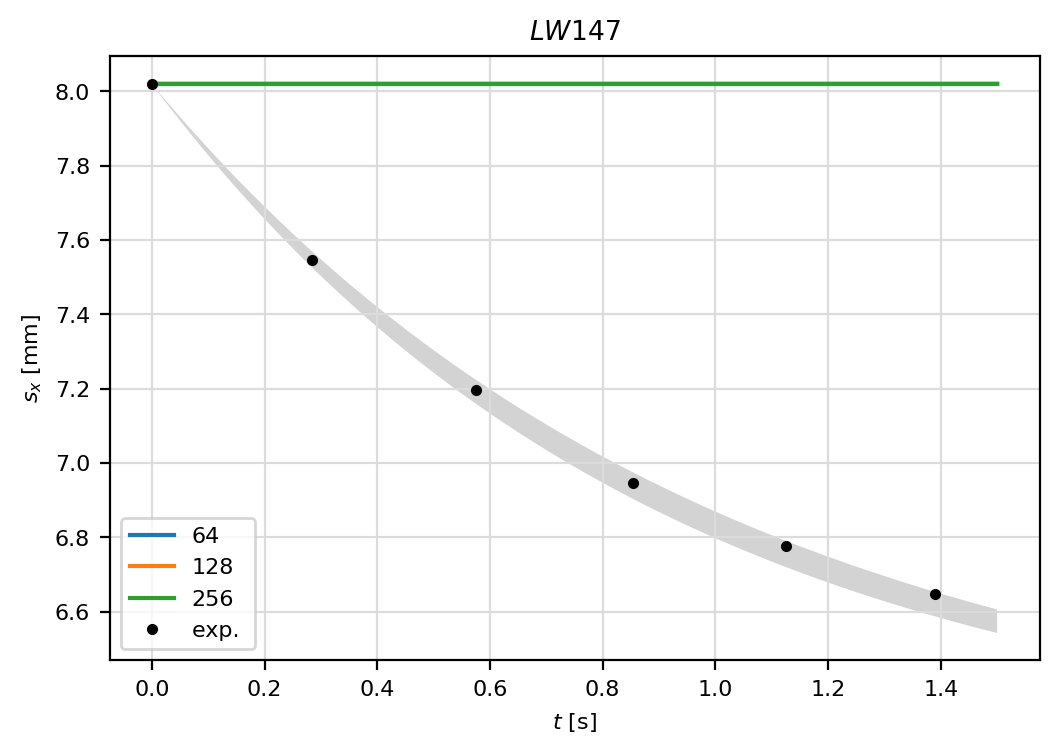

In [6]:
rcParams["figure.dpi"]= 200
plot_Trinh1982("LW147","./")
#plot_Trinh1982("LW180","./")

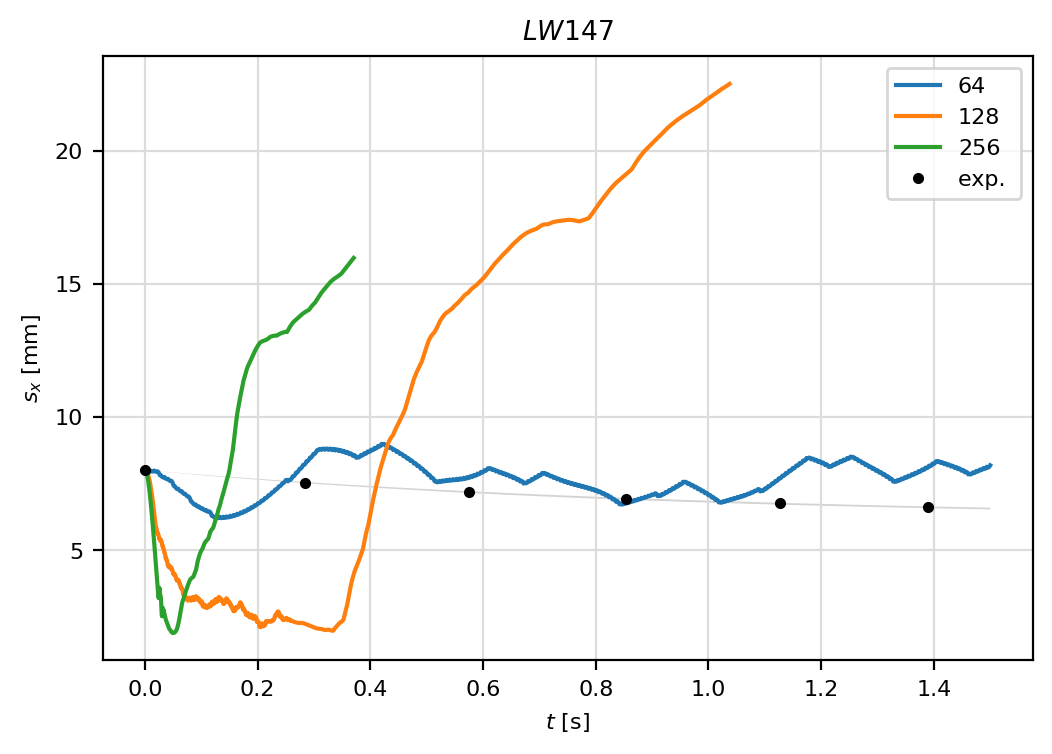

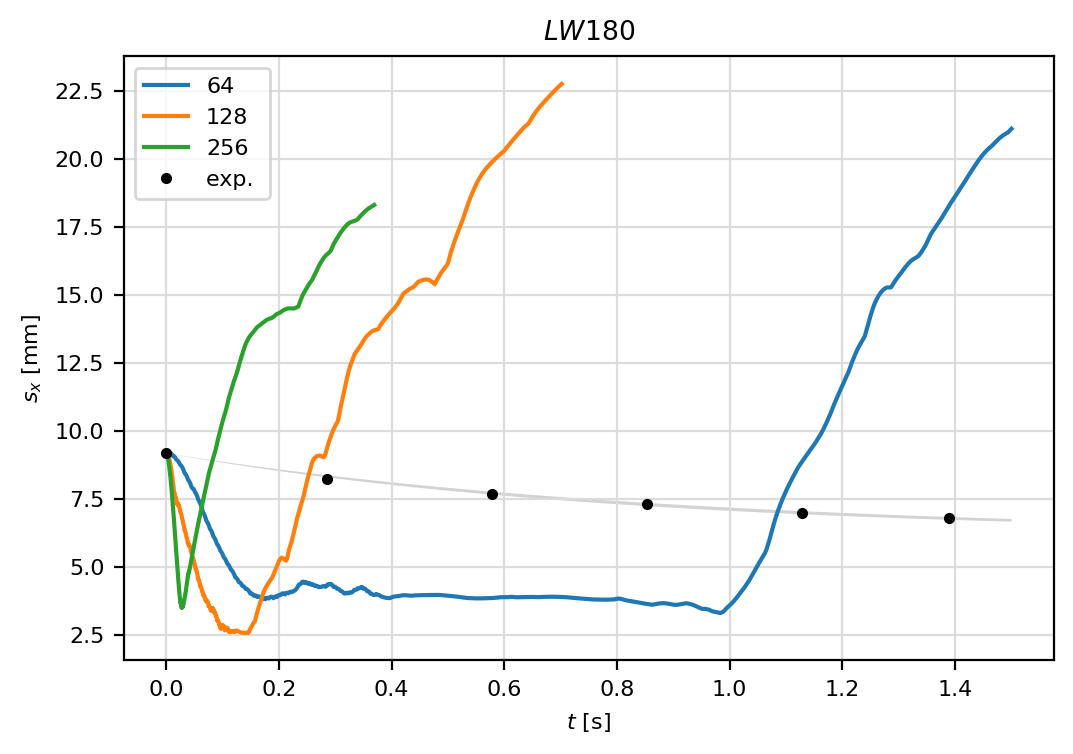

In [3]:
rcParams["figure.dpi"]= 200
plot_Trinh1982("LW147","oldData/withRhoEquation/withMomentumPredictor/limitedLinearV1/")
plot_Trinh1982("LW180","oldData/withRhoEquation/withMomentumPredictor/limitedLinearV1/")

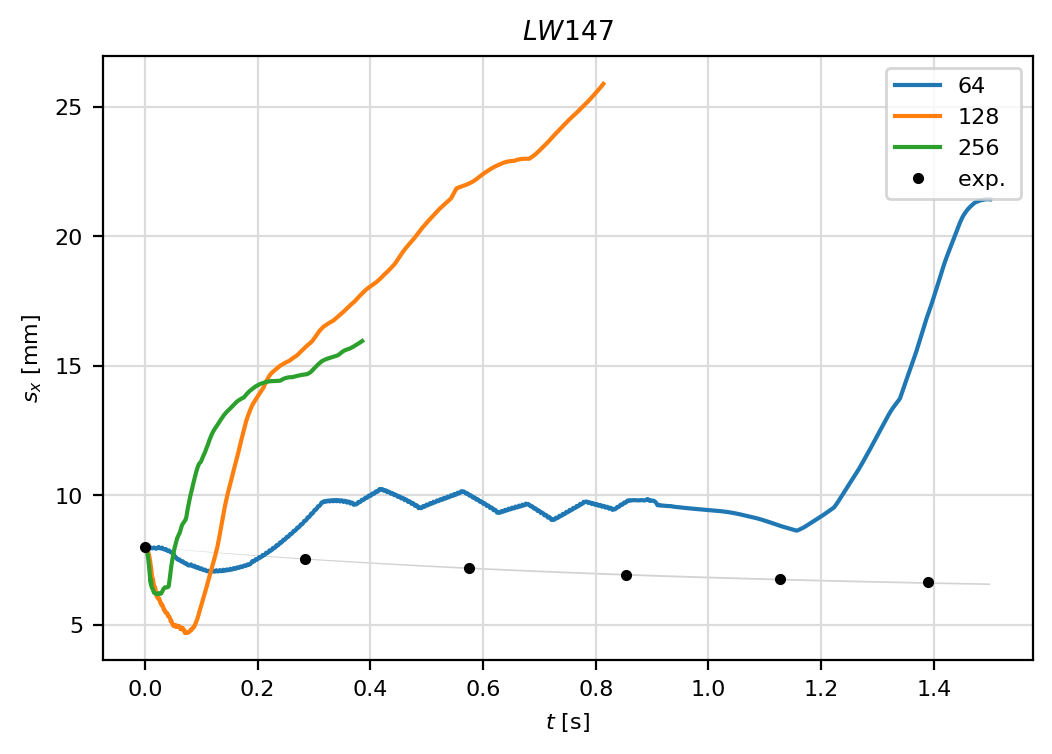

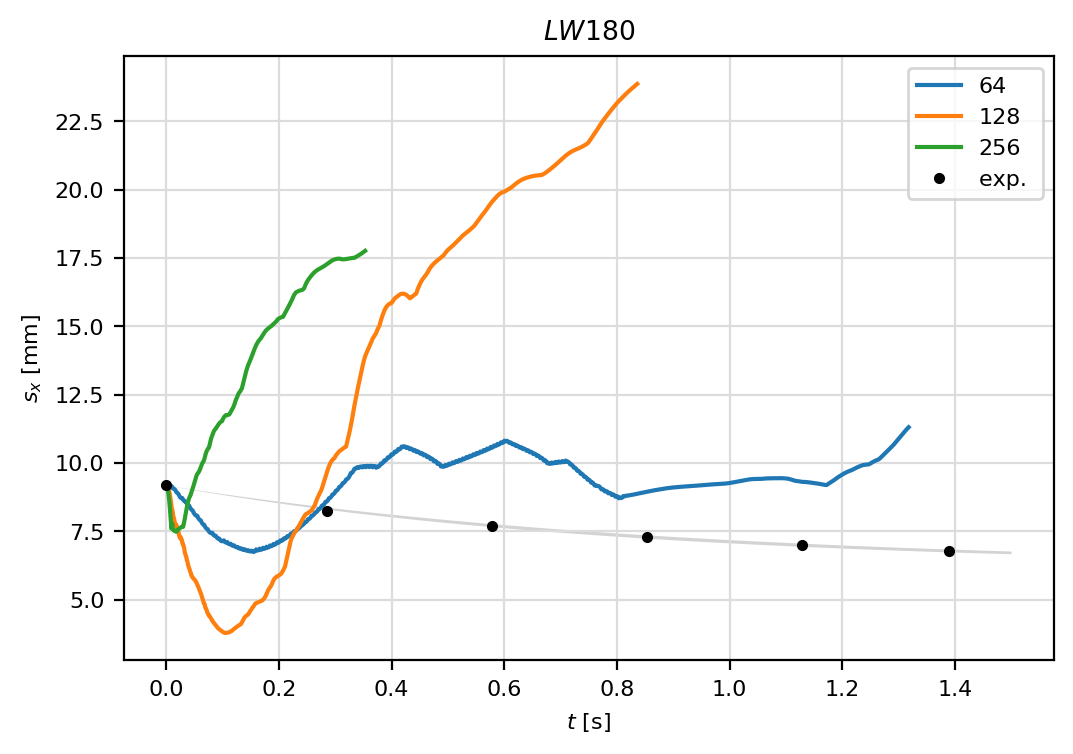

In [14]:
plot_Trinh1982("LW147","noRhoEquation/withMomentumPredictor/limitedLinearV1/")
plot_Trinh1982("LW180","noRhoEquation/withMomentumPredictor/limitedLinearV1/")

In [ ]:
plot_Trinh1982("LW147","withRhoEquation/withMomentumPredictor/limitedLinearV0.5/")
plot_Trinh1982("LW180","withRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

In [ ]:
plot_Trinh1982("LW147","noRhoEquation/withMomentumPredictor/limitedLinearV0.5/")
plot_Trinh1982("LW180","noRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

In [ ]:
plot_Trinh1982("LW147","withRhoEquation/noMomentumPredictor/limitedLinearV1/")
plot_Trinh1982("LW180","withRhoEquation/noMomentumPredictor/limitedLinearV1/")

In [ ]:
plot_Trinh1982("LW147","noRhoEquation/noMomentumPredictor/limitedLinearV1/")
plot_Trinh1982("LW180","noRhoEquation/noMomentumPredictor/limitedLinearV1/")

In [ ]:
plot_Trinh1982("LW147","withRhoEquation/noMomentumPredictor/limitedLinearV0.5/")
plot_Trinh1982("LW180","withRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

In [ ]:
plot_Trinh1982("LW147","noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")
plot_Trinh1982("LW180","noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")